# **Introduction aux CNNs** /  *Introduction to CNNs*

## Réponse

Un CNN est un réseau de neurones convolutif. C'est-à-dire que, contrairement à un réseau de neurones plus anciens comme un fully connected où l’on apprend des biais et des poids, cette fois on va apprendre les poids des filtres de convolution.

Dans ce réseau, on n’a pas que des convolutions, mais on va aussi jouer sur la dimension de nos images intermédiaires, comme avec un max pooling ou un average pooling.

La force de ces réseaux est dans le nombre de couches, d’où le terme deep learning. Dans ce réseau, nous n’avons que deux couches, ce qui est faible.

## VSCode - Configuration / *Setup*

**1. Activer le solver libmamba pour éviter les problèmes liés réseau / activate libmamba solver to avoid network issue**

conda install -n base -y -c conda-forge conda-libmamba-solver

conda config --set solver libmamba

conda config --add channels conda-forge

conda config --set channel_priority strict

**2. Créer un env dédié au TP / creat dedicated TP environment**

conda create -n TP -y -c conda-forge python=3.12 opencv ipykernel jupyterlab

conda install pytorch torchvision

conda install matplotlib

conda install grad-cam

**3. Activer l’env (et lancer Jupyter Lab) / Activate env (and run Jupyter Lab, if from vscode)**

conda activate TP

option: jupyter lab

## Présentation / *Overview*

*Ce TP est tiré des tutoriels Torch (https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) et de l'utilisation de grad-cam pour la visualisation des caractéristiques (https://github.com/utkuozbulak/pytorch-cnn-visualizations?tab=readme-ov-file#convolutional-neural-network-filter-visualization)*

### Description

Concrètement, une convolution est un filtre spatial. Un CNN (convolutional neural network) applique des noyaux (kernels) appris. En traitement d'image traditionnel, nous avons pu aborder différents type de filtres (Laplacien gaussien, bruts, périodiques, ...) qui permettent la détection de bords, de flou, ou de netteté.
Ici, un CNN apprendra les bons filtres à partir des données plutôt que d'explicitement lui donner l'instruction.

Dans les automatismes des CNNs, nous retrouvons également le pooling, qui est une réduction de résolution. Cela correspond au downsampling, et le CNN l'intègre comme un résumé de features.

Le réseau complet correspond à des couches successives de transformations d'images (features map):

1. Détection de bords / textures simpels
2. Motifs complexes (coins, textures, cercles)
3. Parties d'objets (yeux, roues, etc).

-------
*Concretely, a convolution is a spatial filter. A convolutional neural network (CNN) applies learned kernels. In traditional image processing, we’ve covered various types of filters (Laplacian of Gaussian, basic, periodic, …) that enable edge detection, blurring, or sharpening. Here, a CNN learns the appropriate filters from data rather than being explicitly instructed.*
*
In the usual CNN machinery, we also find pooling, which reduces resolution. This corresponds to downsampling, and the CNN uses it as a summary of features.*

*The full network amounts to successive layers of image transformations (feature maps):*
1. *Edge detection / simple textures*
2. *Complex patterns (corners, textures, circles)*
3. *Object parts (eyes, wheels, etc.).*

### Plan / Summary

Dans ce TP:
1. Charger et normaliser les ensembles de données de formation et de test CIFAR10 (TL-10) à l'aide de torchvision
2. Définir un réseau neuronal convolutif
3. Définir une fonction de perte
4. Entraîner le réseau sur les données d'entraînement
5. Tester le réseau sur les données de test
6. Explorer le modèle avec grad-cam

------
In this lab:

1. *Load and normalize the CIFAR10 training and test datasets using torchvision*
2. *Define a Convolutional Neural Network*
3. *Define a loss function*
4. *Train the network on the training data*
5. *Test the network on the test data*
6. *Explore the model with grad-cam*

### Imports

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms

## 1. Charger et normaliser les ensembles de données de formation et de test CIFAR10 (TL-10)
## 1. *Load and normalize the CIFAR10 (TCL-10) training and test datasets using torchvision*

### **/!\ Run the TP with CIRFAR10. Then try to play with STL-10 and improve CNN performance**

Pour ce tutoriel, nous utiliserons le jeu de données CIFAR10 ou STL-10. Il contient les classes suivantes : « avion », « automobile », « oiseau », « chat », « cerf », « chien », « grenouille », « cheval », « bateau » et « camion ». Les images CIFAR-10 ont une taille de 3 x 32 x 32 (3 x 96 x 96 pour STL-10), soit des images couleur à trois canaux de 32 x 32 pixels (96 x 96 pour STL-10).

Attention : les architectures ne sont pas les mêmes pour STL-10 et CIFAR10.

------

*For this tutorial, we will use the CIFAR10 or STL-10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32 (3 x 96 x 96 for STL-10), i.e. 3-channel color images of 32x32 (96 x 96 for STL-10)pixels in size.*

*Warning: architectures are not the same between STL-10 and CIFAR10*

1. CIFAR10

In [29]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

2. STL-10 (to uncomment)

In [30]:
from torchvision.datasets import STL10

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

batch_size = 4

trainset = STL10(root='./data', split='train',
                 download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = STL10(root='./data', split='test',
                download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# STL-10 a 10 classes (remplace 'frog' par 'monkey')
classes = trainset.classes  # ['airplane','bird','car','cat','deer','dog','horse','monkey','ship','truck']


/!\ If running on Windows and you get a BrokenPipeError, try setting the num_worker of torch.utils.data.DataLoader() to 0.

-> Montrer quelques images de formation

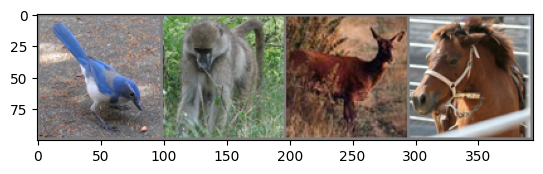

bird  monkey deer  horse


In [31]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 2. Définir un réseau neuronal convolutif / 2. *Define a Convolutional Neural Network*

1. CNN pour CIFAR10 / *CNN for CIFAR10*

In [32]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        pool = True
        avg = "avg"
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 16, 5, padding=3)
        if not pool:
            self.pool = nn.Identity()  # désactive le pooling
        elif avg == "avg":
            self.pool = nn.AvgPool2d(2, 2)
        else:
            self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = F.adaptive_avg_pool2d(x, (5, 5))

        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

# === OPTIONAL: quick knobs for the lab (uncomment one at a time) ===

# 1) More filters (observe more/varied feature maps)
# net.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=0)
# net.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=0); net.force_5x5 = True

# 2) Different kernel sizes (keep size with padding)
# net.conv1 = nn.Conv2d(3, 6, kernel_size=3, padding=1)
# net.conv2 = nn.Conv2d(6, 16, kernel_size=7, padding=3); net.force_5x5 = True

# 3) Disable pooling (see larger, more detailed maps)
# net.pool = nn.Identity(); net.force_5x5 = True

# 4) Compare pooling types
# net.pool = nn.AvgPool2d(2,2)  # vs MaxPool2d(2,2)


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(3, 3))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


  ### 3. Définir une fonction de perte / 3. *Define a loss function*

Utilisons une perte d'entropie croisée de classification et un SGD avec impulsion. / *Let’s use a Classification Cross-Entropy loss and SGD with momentum.*

In [33]:
import torch.optim as optim


### 4. Entraîner le réseau sur les données d'entraînement / 4. *Train the network on the training data*

C'est là que les choses deviennent intéressantes. Il suffit de boucler sur notre itérateur de données, d'alimenter le réseau avec les entrées et de l'optimiser. / *This is when things start to get interesting. We simply have to loop over our data iterator, and feed the inputs to the network and optimize.*

In [55]:
learning_rate = 1e-2      # un peu plus rapide que 1e-3
num_epochs = 3            # plus d'un seul passage pour mieux apprendre

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

Finished Training


Option : On sauvegarde le modèle / *we save the model*

In [47]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

### 5. Tester le réseau sur les données de test / 5. *Test the network on the test data*

Nous avons entraîné le réseau à deux reprises sur l'ensemble de données d'entraînement. Nous devons cependant vérifier si le réseau a réellement appris quelque chose.

Nous vérifierons cela en prédisant l'étiquette de classe générée par le réseau neuronal et en la comparant à la réalité. Si la prédiction est correcte, nous ajouterons l'échantillon à la liste des prédictions correctes.

OK, première étape. Illustrons une image de l'ensemble de test pour nous familiariser.

-----
*We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.*

*We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.*

*Okay, first step. Let us display an image from the test set to get familiar.*

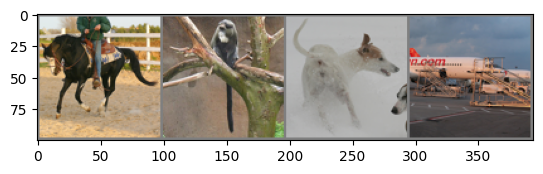

GroundTruth:  horse monkey dog   airplane


In [36]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

Option : On charge le modèle sauvegardé / *We load the saved model*

In [37]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [38]:
outputs = net(images)

## 1 grille feature maps (conv1).

Comme on peut le voir dans la figure en dessous chaque images n'a pas les mêmes zones d'activations plus la zone est foncé moins elle est activé plus elle est claire plus elle est activé.

Les sorties correspondent aux énergies des 10 classes. Plus l'énergie d'une classe est élevée, plus le réseau considère que l'image appartient à cette classe. Prenons donc l'indice de l'énergie la plus élevée :

*The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:*

In [39]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  horse deer  airplane ship 


Les résultats semblent plutôt bons. Voyons comment le réseau fonctionne sur l’ensemble des données.

*The results seem pretty good. Let us look at how the network performs on the whole dataset.*

In [40]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 29 %


In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in testloader:
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

cm = confusion_matrix(y_true, y_pred)
print(cm)

[[595  59   2  12   3  17   9  10  93   0]
 [107 131   0  52 158  56  57 235   4   0]
 [ 96  90 103  46   5  17   7  56 380   0]
 [ 27  77   0 107 233  51  38 256  11   0]
 [ 38  47   0  53 380  28  84 168   2   0]
 [ 25  80   0  43 172  94 104 282   0   0]
 [ 19  43   1  28 197  79 188 245   0   0]
 [  9  64   0  37 254  34  69 333   0   0]
 [365  47   4  28   2   8   4   8 334   0]
 [146  86  22  54   6  27  13  57 389   0]]


[CIFAR-10] Cela semble bien meilleur que le hasard, qui est précis à 10 % (en choisissant une classe au hasard parmi 10 classes). On dirait que le réseau a appris quelque chose. Hmmm, quelles sont les classes qui ont bien fonctionné et celles qui n'ont pas bien fonctionné :

*That looks way better than chance, which is 10% accuracy (randomly picking a class out of 10 classes). Seems like the network learnt something. Hmmm, what are the classes that performed well, and the classes that did not perform well:*

In [41]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 54.2 %
Accuracy for class: bird  is 1.5 %
Accuracy for class: car   is 43.2 %
Accuracy for class: cat   is 30.4 %
Accuracy for class: deer  is 5.4 %
Accuracy for class: dog   is 1.0 %
Accuracy for class: horse is 46.8 %
Accuracy for class: monkey is 27.4 %
Accuracy for class: ship  is 43.5 %
Accuracy for class: truck is 43.4 %


### 6. Explorer le modèle avec grad-cam / 6. *Explore the model with grad-cam*

Using: cpu


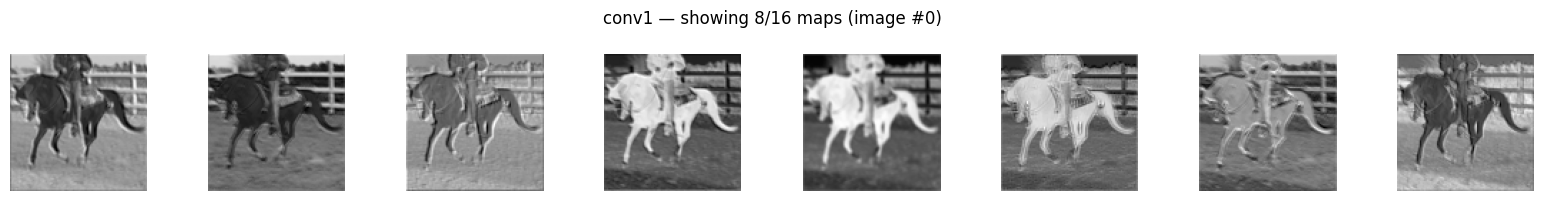

In [54]:
import torch, matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

model = net  # your already-defined/trained model

# ======= CONFIG PARAMS (modify these for the demo) =======
LAYER_NAME      = "conv1"
IMG_INDEX       = 0            # index de l'image dans le batch
MAX_MAPS        = 8            # nombre de feature maps à afficher
CMAP            = "gray"       # couleur pour l'affichage
NORMALIZE_MAPS  = True         # normalisation
HOOK_AFTER_POOL = False        # avant le pooling false

# Activation collector (avoid naming this 'targets' to prevent conflicts with Grad-CAM)
acts = {}
def save_activation(name):
    def hook(module, inp, out):
        acts[name] = out.detach().cpu()
    return hook

# Choose which layer to hook
if HOOK_AFTER_POOL and hasattr(model, "pool"):
    layer = model.pool
    name  = "after_pool"
else:
    layer = getattr(model, LAYER_NAME)  # expects model.conv1 / model.conv2
    name  = LAYER_NAME

# Register the hook
h = layer.register_forward_hook(save_activation(name))

# One forward pass to populate 'acts'
model.eval()
x, y = next(iter(testloader))          # assumes 'testloader' exists
_ = model(x.to(device))

# Get feature maps for the chosen image
fm = acts[name][IMG_INDEX]             # [C, H, W]
n  = min(MAX_MAPS, fm.shape[0])

# Plot
fig, axs = plt.subplots(1, n, figsize=(n*2, 2))
for i in range(n):
    m = fm[i]
    if NORMALIZE_MAPS:
        m = (m - m.min()) / (m.max() - m.min() + 1e-8)
    axs[i].imshow(m.numpy(), cmap=CMAP)
    axs[i].axis("off")
fig.suptitle(f"{name} — showing {n}/{fm.shape[0]} maps (image #{IMG_INDEX})")
plt.tight_layout()
plt.show()

# Clean up
h.remove()


Ce que tu vois est une grille de cartes d’activation produites par conv1 pour la première image du batch. Chaque vignette correspond à la réponse d’un filtre : zones claires = forte activation, sombres = faible. Le hook est posé avant ReLU, donc les motifs peuvent paraître ternes/bruités ; après quelques epochs, on voit souvent des détecteurs de bords/textures. Le nombre de vignettes = out_channels de conv1, et leur taille dépend du kernel/padding (et du pooling s’il intervient ensuite).

*You’re looking at a grid of activation maps from conv1 for the first image in the batch.
Each tile is one filter’s response: bright = strong activation, dark = weak. The hook is pre-ReLU, so patterns may look faint/noisy; after a few epochs you typically see edge/texture detectors. The count of tiles equals conv1’s out_channels, and their spatial size depends on the kernel/padding (and pooling downstream).*


### Plus d'exploration du grad-cam / *More Grad-cam exploration*

In [43]:
# === Drop-in utilities: Grad-CAM + feature maps ===

import torch, torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional, List, Dict

# 1) Safe import for pytorch-grad-cam
try:
    from pytorch_grad_cam import GradCAM
    from pytorch_grad_cam.utils.image import show_cam_on_image
    from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "grad-cam"])
    from pytorch_grad_cam import GradCAM
    from pytorch_grad_cam.utils.image import show_cam_on_image
    from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

# 2) Helpers
def get_device(model: nn.Module) -> torch.device:
    return next(model.parameters()).device

def find_last_conv(model: nn.Module) -> nn.Module:
    last = None
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            last = m
    if last is None:
        raise RuntimeError("No nn.Conv2d layer found in the model.")
    return last

def tensor_to_rgb(img: torch.Tensor, mean: Optional[List[float]]=None, std: Optional[List[float]]=None) -> np.ndarray:
    """
    img: [1 or C, H, W] or [C,H,W] tensor on any device. Returns float RGB [H,W,3] in [0,1].
    """
    if img.dim() == 4:  # [1,C,H,W] -> [C,H,W]
        img = img[0]
    img = img.detach().float().cpu()
    if mean is not None and std is not None:
        mean_t = torch.tensor(mean).view(-1,1,1)
        std_t  = torch.tensor(std).view(-1,1,1)
        img = img * std_t + mean_t
    # clamp and ensure 3 channels
    if img.shape[0] == 1:
        img = img.repeat(3,1,1)
    elif img.shape[0] != 3:
        # take first 3 if more (best-effort for exotic inputs)
        img = img[:3]
    img = img.clamp(0,1)
    rgb = img.permute(1,2,0).numpy()
    return rgb

# 3) Feature maps via forward hooks
class FeatureMapCatcher:
    def __init__(self, model: nn.Module, layers: Dict[str, nn.Module]):
        self.model = model
        self.layers = layers
        self.activations: Dict[str, torch.Tensor] = {}
        self._hooks = []

    def _mk_hook(self, name):
        def hook(module, inp, out):
            self.activations[name] = out.detach().cpu()
        return hook

    def register(self):
        self.remove()  # just in case
        for name, layer in self.layers.items():
            self._hooks.append(layer.register_forward_hook(self._mk_hook(name)))

    def remove(self):
        for h in self._hooks:
            h.remove()
        self._hooks = []

# 4) Run Grad-CAM
@torch.no_grad()
def predict_classes(model: nn.Module, x: torch.Tensor) -> List[int]:
    model.eval()
    logits = model(x)
    return logits.argmax(1).tolist()

def run_gradcam(
    model: nn.Module,
    batch_x: torch.Tensor,
    target_layer: Optional[nn.Module] = None,
    mean: Optional[List[float]] = None,
    std: Optional[List[float]] = None,
    targets: Optional[List[ClassifierOutputTarget]] = None,
    index: int = 0,
    show: bool = True,
):
    """
    Compute CAM for one image in a batch, overlay on RGB, and optionally display.
    - If targets=None, CAM uses top-1 class per image.
    - If target_layer=None, uses the last Conv2d found in the model.
    """
    device = get_device(model)
    x = batch_x.to(device)

    target_layer = target_layer or find_last_conv(model)

    with GradCAM(model=model, target_layers=[target_layer]) as cam:
        grayscale_cams = cam(input_tensor=x, targets=targets)  # [N,H,W]

    # Prepare background RGB for overlay
    rgb = tensor_to_rgb(batch_x[index:index+1], mean=mean, std=std)
    vis = show_cam_on_image(rgb, grayscale_cams[index], use_rgb=True)

    if show:
        plt.figure(figsize=(4,4))
        plt.imshow(vis); plt.axis("off"); plt.title("Grad-CAM overlay")
        plt.show()

    return grayscale_cams[index], vis


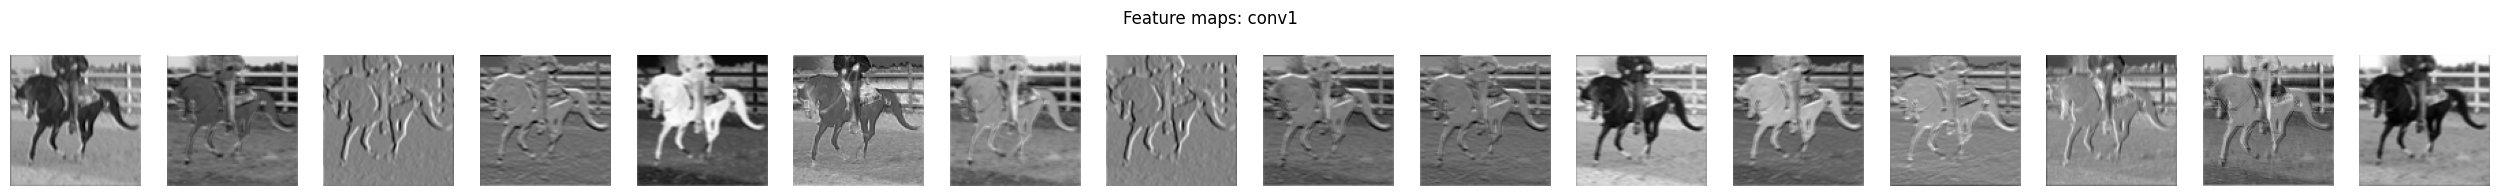

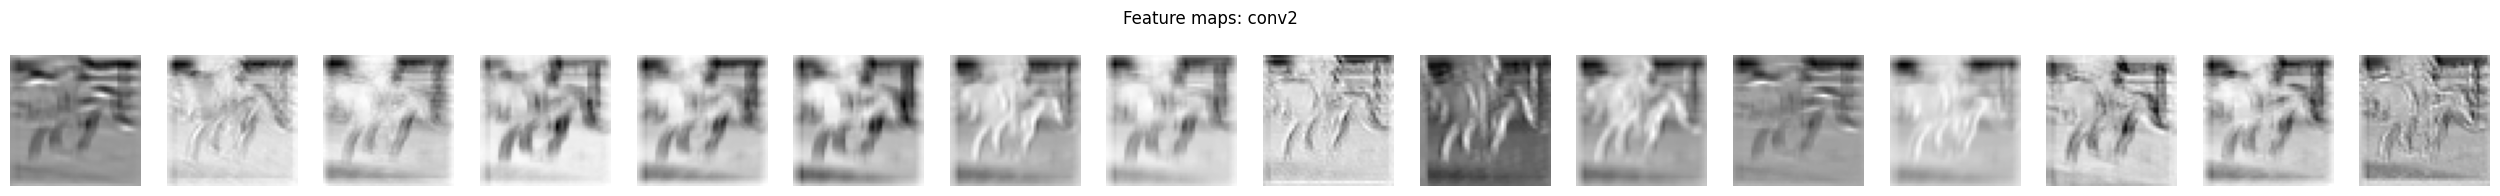

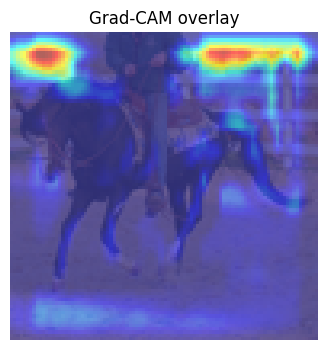

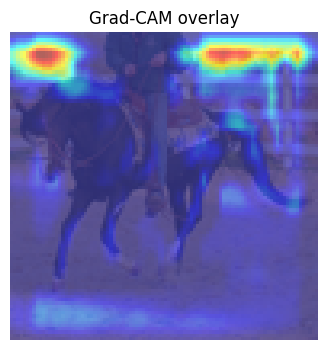

In [56]:
# 0) Mean/Std if you normalize (otherwise set mean/std=None)
mean = [0.4914, 0.4822, 0.4465]
std  = [0.2023, 0.1994, 0.2010]

# 1) Grab a batch
images, labels = next(iter(testloader))

# 2) (Optional) Visualize feature maps from two layers

layers_to_peek = {
    "conv1": model.conv1,
    "conv2": model.conv2
}
# Example: layers_to_peek = {"conv1": model.conv1, "conv2": model.conv2}

catcher = FeatureMapCatcher(model, layers_to_peek)
catcher.register()
_ = model(images.to(get_device(model)))  # forward to populate catcher.activations
catcher.remove()

# Display the first n maps for the first image
for name, act in catcher.activations.items():
    fm = act[0]                    # [C,H,W] for image 0
    n = min(16, fm.shape[0])
    fig, axs = plt.subplots(1, n, figsize=(n*2, 2))
    for i in range(n):
        axs[i].imshow(fm[i].numpy(), cmap="gray")
        axs[i].axis("off")
    fig.suptitle(f"Feature maps: {name}", y=1.05)
    plt.show()

# 3) Grad-CAM (top-1 class automatically)
_ = run_gradcam(
    model=model,
    batch_x=images,          # <— your batch
    target_layer=None,       # auto: last conv of the model
    mean=mean, std=std,      # None/None if you did not normalize
    targets=None,            # top-1 per image
    index=0,                 # shows image 0 of the batch
    show=True
)

# 4) (Option) Grad-CAM on a specified class, e.g., the predicted class for each image
preds = predict_classes(model, images.to(get_device(model)))
cam_targets = [ClassifierOutputTarget(c) for c in preds]
_ = run_gradcam(model, images, targets=cam_targets, mean=mean, std=std, index=0, show=True)


Comme nous pouvons le voir nous n'avons les mêmes du tout les même filtres

In [45]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import torch, torch.nn as nn

def find_last_conv(model: nn.Module) -> nn.Module:
    last = None
    for m in model.modules():
        if isinstance(m, nn.Conv2d):
            last = m
    if last is None:
        raise RuntimeError("No nn.Conv2d layer found in the model.")
    return last


images, labels = next(iter(testloader))

device = next(model.parameters()).device
batch_x = images.to(device)

target_layer = find_last_conv(model)

with GradCAM(model=model, target_layers=[target_layer]) as cam:
    grayscale_cams = cam(input_tensor=batch_x, targets=None)  # np.ndarray [N,H,W]

print(type(grayscale_cams), grayscale_cams.shape)  # vérif rapide


<class 'numpy.ndarray'> (4, 96, 96)


More grad-cam

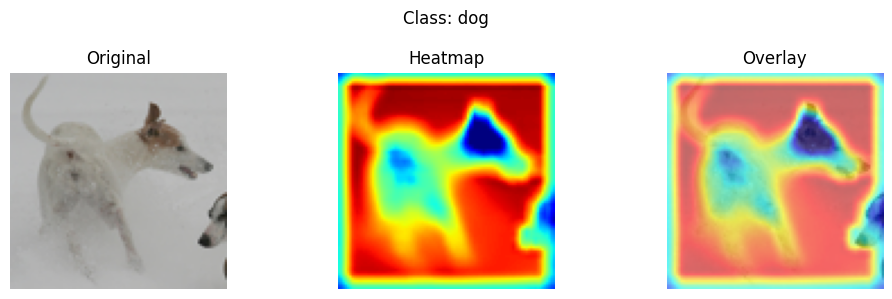

In [46]:
import torch, numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
from pytorch_grad_cam.utils.image import show_cam_on_image

# --- Helpers (if not already defined) ---
def to_rgb(img, mean=None, std=None):
    """img: [1,C,H,W] or [C,H,W] -> np.float32 [H,W,3] in [0,1]"""
    if img.dim() == 4:
        img = img[0]
    img = img.detach().float().cpu()
    if (mean is not None) and (std is not None):
        m = torch.tensor(mean).view(-1,1,1)
        s = torch.tensor(std).view(-1,1,1)
        img = img * s + m
    img = img.clamp(0, 1)
    if img.shape[0] == 1:  # grayscale -> RGB
        img = img.repeat(3,1,1)
    elif img.shape[0] > 3:
        img = img[:3]
    return img.permute(1,2,0).numpy()

def show_cam_triptych(rgb, cam, title_left="Original", title_mid="Heatmap", title_right="Overlay", suptitle=None):
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    overlay = show_cam_on_image(rgb, cam, use_rgb=True)
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    axs[0].imshow(rgb);     axs[0].set_title(title_left);  axs[0].axis("off")
    axs[1].imshow(cam, cmap="jet"); axs[1].set_title(title_mid);   axs[1].axis("off")
    axs[2].imshow(overlay); axs[2].set_title(title_right); axs[2].axis("off")
    if suptitle: fig.suptitle(suptitle)
    plt.tight_layout(); plt.show()

# --- Display params (adapt to YOUR normalization pipeline) ---
# If you normalize with 0.5 (like in your STL-10 code):
MEAN = [0.5, 0.5, 0.5]; STD = [0.5, 0.5, 0.5]
# If you use canonical CIFAR-10 stats, replace with:
# MEAN = [0.4914, 0.4822, 0.4465]; STD = [0.2023, 0.1994, 0.2010]

# --- Pick an image from the batch and prepare data ---
i = 2  # which image to display
rgb = to_rgb(images[i:i+1], mean=MEAN, std=STD)

cam = grayscale_cams[i]
if isinstance(cam, torch.Tensor):
    cam = cam.detach().cpu().numpy()
cam = cam.astype(np.float32)

# If the CAM size differs from the image size, resize it properly
H, W = rgb.shape[:2]
if cam.shape != (H, W):
    cam_t = torch.from_numpy(cam)[None, None]               # [1,1,h,w]
    cam = F.interpolate(cam_t, size=(H, W), mode="bilinear", align_corners=False).squeeze().numpy()

# Class name (labels may live on the GPU)
cls_idx = int(labels[i].detach().cpu().item()) if torch.is_tensor(labels) else int(labels[i])
label_name = classes[cls_idx] if isinstance(classes, (list, tuple)) else str(cls_idx)

# --- Side-by-side display: original / heatmap / overlay ---
show_cam_triptych(rgb, cam, suptitle=f"Class: {label_name}")
